# นาย กิตติภณ  สุรุ่งเรืองสกุล 61070278

# Assignment 1

In [1]:
#!pip install urllib requests
#ลง urllib และ requests ก่อนถ้ายังไม่มี
import json, urllib
import pandas as pd
import numpy as np

# ดัชนีราคาผู้บริโภคทั่วไป (Consumer Price Index) 

### วิเคราะห์ดัชนีราคาผู้บริโภคทั่วไปในกรุงเทพและปริมณฑล ตั้งแต่ปีค.ศ. 2017-2020 และในยุคโควิด-19



แหล่งข้อมูล: https://data.moc.go.th/OpenData/CPIGIndexes

## Query Parameters

| Name | Data type | Description | Default |
| --- | --- | --- | --- |
| region_id | Integer | รหัสภูมิภาค (0 = กรุงเทพและปริมณฑล, 1 = ภาคกลาง, 2 = ภาคตะวันออกเฉียงเหนือ, 3 = ภาคเหนือ, 4 = ภาคใต้, 5 = ประเทศ) | - |
| index_id | String | รหัสหมวด / กลุ่มดัชนี | 0000000000000000 |
| from_year | Integer | ปีที่จัดทำดัชนีเริ่มต้น (ค.ศ.) | - |
| to_year | Integer | ปีที่จัดทำดัชนีสิ้นสุด (ค.ศ.) | - |

Link API: https://dataapi.moc.go.th/cpig-indexes

Example: https://dataapi.moc.go.th/cpig-indexes?region_id=1&index_id=1000000000000000&from_year=2017&to_year=2020

- ค้นหาข้อมูลใน **ภาคกลาง**
- รหัสหมวดที่ **1000000000000000**
- ปีที่จัดทำดัชนีเริ่มต้นที่ปี **2017**
- ปีที่จัดทำดัชนีสิ้นสุดที่ปี **2020**

## Responses

Type: Array

- ผลลัพธ์จะมีการเรียงลำดับโดยปีที่จัดทำดัชนี ตามด้วยเดือนที่จัดทำดัชนี ตามด้วยรหัสภูมิภาค

| Name | Data type | Description |
| --- | --- | --- |
| index_id | String | รหัสหมวด / กลุ่มดัชนี |
| index_description | String | ชื่อหมวด / กลุ่มดัชนี |
| region_id | Integer | รหัสภูมิภาค |
| region_name | String | ชื่อภูมิภาค |
| base_year | 	Integer	 | ปีฐานดัชนี |
| year | 	Integer	 | ปีที่จัดทำดัชนี |
| month | 	Integer	 | เดือนที่จัดทำดัชนี |
| price_index | Float | ดัชนีราคา |
| mon | Float | อัตราการเปลี่ยนแปลงเทียบกับเดือนก่อนหน้า |
| yoy | Float | อัตราการเปลี่ยนแปลงเทียบกับเดือนเดียวกันปีก่อนหน้า |
| aoa | Float | อัตราการเปลี่ยนแปลงเทียบกับช่วงเดียวกันปีก่อนหน้า |

![NewIMG](data/response_ex.PNG)


## รหัสหมวด/กลุ่มดัชนี (Index_id)
แสดงรหัสหมวด/กลุ่มดัชนี (Index_id) ที่ใช้ใส่ในลิงก์ API ถ้าไม่ใส่จะใช้เป็นค่าเริ่มต้นคือ 0000000000000000

In [2]:
index_id_df = pd.read_csv('data/รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv', dtype={'รหัสดัชนี': np.int64})
index_id_df

,รหัสดัชนี,ชื่อหมวด/กลุ่มดัชนี
0,0,รวมทุกรายการ
1,1000000000000000,หมวดอาหารและเครื่องดื่มไม่มีแอลกอฮอล์
2,1100000000000000,อาหารปรุงที่บ้าน
3,1110000000000000,ข้าว แป้งและผลิตภัณฑ์จากแป้ง
4,1111000000000000,ข้าว
...,...,...
185,9510000000000000,น้ำมัน 91 95 ดีเซล
186,9520000000000000,CPI ไม่รวมน้ำมัน 91 95 ดีเซล
187,9600000000000000,CPI ไม่รวมน้ำมัน 91 95 ดีเซล และรายการของ คน.
188,9700000000000000,CPI ไม่รวมอาหารสด


# Data collection and storage

## ดึงข้อมูลจากลิงก์ API

อ่านข้อมูล**รหัสหมวด/กลุ่มดัชนี (Index_id)** จากไฟล์ **รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv** ที่เก็บไว้ในโฟลเดอร์ data

ข้อมูลที่อ่านมาจะเก็บไว้ในตัวแปร **CPI_Index** แต่ค่าที่ต้องการใช้มีแค่**รหัสหมวด/กลุ่มดัชนี (Index_id)** จึงทำการเลือกเฉพาะคอลัมน์**รหัสดัชนี**แล้วเก็บไว้ในตัวแปร **CPI_index_id**

ข้อมูลที่เก็บไว้ในตัวแปร **CPI_index_id** อยู่ในรูปแบบของ pandas.Series ซึ่งไม่สะดวกต่อการใช้งานจึงทำการเปลี่ยนให้อยู่ในรูปแบบของ list โดยเก็บข้อมูลไว้ในตัวแปร **CPI_index_id_list**

In [38]:
CPI_Index = pd.read_csv("data/รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv", dtype={'รหัสดัชนี': np.int64})
CPI_index_id = CPI_Index['รหัสดัชนี']
CPI_index_id_list = CPI_index_id.tolist()
print('Sample index_id:', CPI_index_id_list[:5])

Sample index_id: [0, 1000000000000000, 1100000000000000, 1110000000000000, 1111000000000000]


สร้างตัวแปร **data** เพื่อรอเก็บข้อมูลที่อ่านเข้ามา

In [4]:
data = []

def addData(lists): #รับข้อมูลที่อยู่ในรุปแบบของ list
    for i in range(len(lists)): #อ่านข้อมูลตามความยาวของ list นั้น
        data.append(lists[i]) #เอาข้อมูลใน list แต่ละตัวซึ่งอยู่ในรูปของ dict ไปเก็บไว้ในตัวแปร data

ในงานนี้จะวิเคราะห์เฉพาะดัชนีราคาผู้บริโภคทั่วไปในกรุงเทพและปริมณฑล ตั้งแต่ปีค.ศ. 2017-2020 เลยทำการสร้างและกำหนดค่าตัวแปร
- **region_id** เท่ากับ 0 (กรุงเทพและปริมณฑล)
- **from_year** เท่ากับ 2017 (เริ่มอ่านข้อมูลตั้งแต่ปีค.ศ. 2017)
- **to_year** เท่ากับ 2020 (อ่านข้อมูลถึงปีค.ศ. 2020)

_ถ้าต้องการดึงข้อมูลในภูมิภาค ปีเริ่มต้นและปีสุดท้ายอื่น ๆ สามารถแก้ไขค่าที่ตัวแปรได้เลย_


เนื่องจากข้อมูลที่ต้องการดึงมีหลายหมวดจึงต้องทำการสร้างลิงก์ API แล้วค่อย ๆ ดึงทีละรอบ 

โดยเริ่มจากวนลูปในตัวแปร **CPI_index_id_list** ที่เก็บข้อมูลรหัสหมวด/กลุ่มดัชนี (Index_id) โดย i ในแต่ละรอบคือรหัสหมวดที่ต้องใส่ไปในลิงก์ จึงทำการสร้างตัวแปร **url** เพื่อใช้เก็บลิงก์ที่จะขอข้อมูลในแต่ละรอบ จากนั้นก็เอา parameters ต่าง ๆ ใส่เข้าไป 

โดยที่ต้องใส่โค้ดส่วนนี้ `str(i) + ('0' * (16 - len(str(i))))` เพราะว่า **index_id** ที่ใช้ใส่ในลิงก์ API ต้องมีทั้งหมด 16 หลักและเลข 0 ต่อท้ายถ้าหากไม่ครบ 16 หลัก (0000000000000000) แต่ข้อมูลใน **CPI_index_id_list** บางตัวมีไม่ถึง 16 หลัก เช่น 0
- โค้ดในส่วนนี้ `str(i)` จึงทำการแปลงข้อมูลเป็น string เพื่อรวมกับส่วนด้านหลัง
- โค้ดในส่วนนี้ `('0' * (16 - len(str(i))))` จะทำการนับความยาวของ i ซึ่งคือ index_id ที่วนเข้ามาในแต่ละรอบ จึงทำการแปลงข้อมูล string แล้วค่อยทำการนับความยาวของ i แล้วนำ 16 - ความยาวของ i เพื่อนำไปคูณกับ '0' เพื่อสร้าง 0 ที่เหลือมาต่อท้ายกับโค้ดในส่วนด้านหน้าเพื่อให้ index_id ครบ 16 หลัก

Example รอบที่ 1-3:
1. https://dataapi.moc.go.th/cpig-indexes?region_id=0&index_id=0000000000000000&from_year=2017&to_year=2020
2. https://dataapi.moc.go.th/cpig-indexes?region_id=0&index_id=1000000000000000&from_year=2017&to_year=2020
3. https://dataapi.moc.go.th/cpig-indexes?region_id=0&index_id=1100000000000000&from_year=2017&to_year=2020

In [6]:
region_id = "0"
from_year="2017"
to_year="2020"

# url = 'https://dataapi.moc.go.th/cpig-indexes?region_id=0&index_id=1000000000000000&from_year=2017&to_year=2020'

for i in CPI_index_id_list:
    url = "https://dataapi.moc.go.th/cpig-indexes?region_id=" + region_id + "&index_id=" + str(i) + ('0' * (16 - len(str(i)) ) ) + "&from_year=" + from_year + "&to_year=" + to_year
    
    response = urllib.request.urlopen(url) #ส่ง request ขอข้อมูล
    raw_json = response.read().decode("utf-8") #อ่านข้อมูลที่รับกลับมา ข้อมูลมีส่วนที่เป็นภาษาไทยเลยต้อง decode ด้วย utf-8
    addData(json.loads(raw_json)) #loads json ที่อ่านค่าได้ซึ่งเมื่ออ่านแล้วจะอยู่ในรูป [{key:value}] ส่งค่าที่อ่านได้ที่อยู่ในรูปของ list ไปที่ function addData() เพื่อเอาข้อมูลมาเก็บไว้
    
print(len(data))

7748


แปลงจากรูปแบบ json เป็น dataframe

In [7]:
df = pd.json_normalize(data) #นำตัวแปร data ที่เก็บข้อมูลทั้งหมดไว้มาแปลงให้อยู่ในรูปของ dataframe
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0000000000000000,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7743,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,8,102.67,0.23,-0.21,-0.69
7744,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,102.45,0.04,0.19,0.39
7745,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,12,102.48,0.03,0.67,0.41
7746,9800000000000000,CPI ไม่รวมพลังงาน,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,103.05,-0.13,0.84,1.27


## แปลงข้อมูลจาก DataFrame ไปเป็น .csv

เก็บข้อมูลที่ดึงมาไว้ในชื่อ **data.csv**

In [8]:
#เก็บข้อมูลในรูปแบบไฟล์ csv โดยเก็บไว้ในชื่อว่า data.csv และต้องตั้งค่า encoding เป็น utf-8-sig เพราะมีข้อมูลที่เป็นภาษาไทย 
df.to_csv('data/data.csv', header=True, index=False, encoding='utf-8-sig')

# Data pre-processing and analysis

อ่านข้อมูลที่เก็บไว้ในชื่อ **data.csv** เพื่อนำมาทำความสะอาดก่อนนำใช้ในไปวิเคราะห์

In [9]:
#อ่านข้อมูล data.csv แล้วเก็บไว้ในตัวแปร df เพื่อใช้ในการทำ pre-processing
df = pd.read_csv('data/data.csv')
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7743,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,8,102.67,0.23,-0.21,-0.69
7744,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,102.45,0.04,0.19,0.39
7745,9700000000000000,CPI ไม่รวมอาหารสด,0,กรุงเทพมหานครและปริมณฑล,2015,2019,12,102.48,0.03,0.67,0.41
7746,9800000000000000,CPI ไม่รวมพลังงาน,0,กรุงเทพมหานครและปริมณฑล,2015,2019,11,103.05,-0.13,0.84,1.27


หาค่า missing value โดยใช้คำสั่ง isna() ในการดูว่าเป็นค่า missing value หรือไม่ ถ้าเป็นจะขึ้นว่า True แต่ถ้าไม่เป็นจะขึ้นว่า False แล้วใช้คำสั่ง sum() ในการนับจำนวน missing value ทั้งหมด

In [10]:
df.isna().sum()

index_id             0
index_description    0
region_id            0
region_name          0
base_year            0
year                 0
month                0
price_index          0
mon                  0
yoy                  0
aoa                  0
dtype: int64

หลังจากตรวจสอบแล้วข้อมูลที่ดึงมาไม่มีค่า missing value

ทำการ group แถวที่มี **index_description** เหมือนกันแล้วทำการนับจำนวนแถว ข้อมูลที่ได้จะอยู่ในรูปของ pandas.Series และเก็บไว้ในตัวแปร **countGroup**

เนื่องจากตัวแปร **countGroup** อ่านค่าลำบาก เลยแปลงให้อยู่ในรูปของ dict เพื่อที่จะได้เห็นชัดเจนว่า **index_description** แต่ละตัวมีจำนวนแถวทั้งหมดเท่าไรและเก็บไว้ในตัวแปร **dictCountGroup**

เอาตัวแปร **dictCountGroup** มาเรียงลำดับจากน้อยไปมากโดยเรียงจาก value ซึ่งคือจำนวนแถวทั้งหมด เพื่อให้ง่ายต่อการวิเคราะห์

In [11]:
countGroup = df['index_description'].groupby(df['index_description']).count()
dictCountGroup = countGroup.to_dict()
{k: v for k, v in sorted(dictCountGroup.items(), key=lambda item: item[1])}

{'CPI ไม่รวมพลังงาน': 2,
 'CPI ไม่รวมอาหารสด': 2,
 'CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล': 44,
 'กลุ่มอาหารสดและพลังงาน': 44,
 'กางเกงบุรุษ': 44,
 'กางเกงสตรีและกระโปรงสตรี': 44,
 'กางเกงเด็ก': 44,
 'การบันเทิงและการอ่าน': 44,
 'การศาสนา': 44,
 'การศึกษา': 44,
 'การศึกษาระดับประถมศึกษา': 44,
 'การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ': 44,
 'การศึกษาระดับมัธยมศึกษาสายสามัญ': 44,
 'การศึกษาระดับอุดมศึกษา': 44,
 'การสื่อสาร': 44,
 'ของเล่น': 44,
 'ข้าว': 44,
 'ข้าว  แป้งและผลิตภัณฑ์จากแป้ง': 44,
 'คนรับใช้ / คนงาน': 44,
 'คนไข้นอก': 44,
 'คนไข้ใน': 44,
 'ค่าการบันเทิง': 44,
 'ค่าของใช้ส่วนบุคคล': 44,
 'ค่าจ้าง': 44,
 'ค่าจ้างตัดเย็บและอุปกรณ์': 44,
 'ค่าซื้อยานพาหนะ': 44,
 'ค่าซ่อมแซม': 44,
 'ค่าซ่อมแซมและดูแลรักษา': 44,
 'ค่าตรวจรักษา ค่าบริการ และค่ายาของคนไข้ใน': 44,
 'ค่าตรวจรักษาและค่ายา': 44,
 'ค่าตรวจวินิจฉัยทางห้องปฏิบัติการ': 44,
 'ค่าตรวจสายตา': 44,
 'ค่าตรวจโรครักษา ค่าบริการ และค่ายาของคนไข้นอก': 44,
 'ค่าทำฟัน': 44,
 'ค่าที่พักอาศัย': 44,
 'ค่าธรรมเนียมและค่าสมาชิก': 44,
 'ค่

หลังจากทำการรันแล้วจะเห็นได้ว่าหมวดส่วนใหญ่จะมีแถวทั้งหมด 44 แถว โดย 44 แถวมาจากปีค.ศ. 2017-2020 โดยปีค.ศ. 2017-2019 แต่ละปีจะมีทั้งหมด 12 แถว แต่ปีค.ศ. 2020 ยังไม่จบปีเลยมีข้อมูลถึงแค่เดือนสิงหาคมจึงทำให้มีทั้งหมด 8 แถว เมื่อนำมารวมกันแล้ว (12+12+12+8) จึงมีทั้งหมด 44 แถว _(1 แถว = 1 เดือน)_

แต่จะมี 3 หมวดที่แตกต่างจากหมวดอื่น ๆ ได้แก่ **CPI ไม่รวมพลังงาน, CPI ไม่รวมอาหารสด** มีทั้งหมด 2 แถวและ **ค่าบริการอื่น ๆ** มีทั้งหมด 88 แถว

ลบแถวที่มี index_description เท่ากับ **CPI ไม่รวมพลังงาน**และ **CPI ไม่รวมอาหารสด** เพราะมีข้อมูลน้อยไป เนื่องจากงานนี้จะวิเคราะห์ดัชนีราคาผู้บริโภคทั่วไปในกรุงเทพและปริมณฑล ตั้งแต่ปีค.ศ. 2017-2020 ซึ่งต้องมีข้อมูลทั้งหมดหมวดละ 44 แถว แต่ 2 หมวดดังกล่าวมีข้อมูลไม่พอจึงต้องลบทิ้ง

In [12]:
df = df[df.index_description != 'CPI ไม่รวมพลังงาน']
df = df[df.index_description != 'CPI ไม่รวมอาหารสด']

ตรวจสอบแถวที่มี index_description เท่ากับ **ค่าบริการอื่น ๆ** เพราะมีจำนวนแถวที่แตกต่างจากข้อมูลตัวอื่น ๆ

In [13]:
df[df.index_description == 'ค่าบริการอื่น ๆ']

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
4576,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,102.08,0.0,1.46,1.46
4577,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,102.08,0.0,1.46,1.46
4578,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,102.08,0.0,1.46,1.46
4579,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,102.08,0.0,1.46,1.46
4580,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,102.08,0.0,1.46,1.46
...,...,...,...,...,...,...,...,...,...,...,...
4835,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,4,103.82,0.0,0.00,0.00
4836,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,5,103.82,0.0,0.00,0.00
4837,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,6,103.82,0.0,0.00,0.00
4838,4122400000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2020,7,103.82,0.0,0.00,0.00


หลังจากตรวจสอบจะเห็นว่าทั้ง 2 ตัวมีข้อมูล **index_id, price_index** ที่แตกต่างกัน แต่มี **index_description** ที่เหมือนกันเลยทำให้มีจำนวนแถวมากกว่าหมวดอื่น ๆ

จึงทำการแก้ไข้โดยนำ **price_index** ของทั้ง 2 ตัวมาเฉลี่ยกัน แล้วนำค่าเฉลี่ยที่ได้แทนลงไปใน **price_index** ของ **index_id** ที่เท่ากับ `4121500000000000` แล้วทำการลบแถวที่ **index_id** เท่ากับ `4122400000000000`

In [14]:
print('index_id = 4121500000000000\n', 'price_index =', df[df.index_id == 4121500000000000]['price_index'].drop_duplicates().iloc[0], 
      '\n\n',
      'index_id = 4122400000000000\n', 'price_index =', df[df.index_id == 4122400000000000]['price_index'].drop_duplicates().iloc[0])

index_id = 4121500000000000
 price_index = 102.08 

 index_id = 4122400000000000
 price_index = 103.82


เก็บ price_index ของ index_id ที่เท่ากับ **4121500000000000** ไว้ในตัวแปร **priceIndexFirst**

เก็บ price_index ของ index_id ที่เท่ากับ **4122400000000000** ไว้ในตัวแปร **priceIndexSecond**

In [15]:
#กำหนดให้ priceIndexFirst เก็บค่า price_index ของ index_id ที่เท่ากับ 4121500000000000
priceIndexFirst =  df[df.index_id == 4121500000000000]['price_index'].iloc[0]

#กำหนดให้ priceIndexSecond เก็บค่า price_index ของ index_id ที่เท่ากับ 4122400000000000
priceIndexSecond =  df[df.index_id == 4122400000000000]['price_index'].iloc[0]

นำ price_index ของทั้งสองมาเฉลี่ยกันแล้วเก็บไว้ในตัวแปร newPriceIndex เพื่อนำไปใช้ในการแทนค่าใหม่

นำตัวแปร newPriceIndex แทนค่าลงไปที่ index_id เท่ากับ 4121500000000000

In [16]:
#นำ price_index ของทั้งสองตัวมาบวกกันแล้วหาร 2 แล้วเก็บไว้ในตัวแปร newPriceIndex
newPriceIndex = ((df[df.index_id == 4121500000000000]['price_index'].add(priceIndexSecond, fill_value=0))/2).iloc[0]
print(newPriceIndex)

#นำ newPriceIndex ที่เป็นค่าเฉลี่ยของทั้งสองตัว มาแทนค่าลงไปใน index_id ที่เท่ากับ 4121500000000000
df[df.index_id == 4121500000000000] = df[df.index_id == 4121500000000000].replace(priceIndexFirst, newPriceIndex)

102.94999999999999


หลังจากแทนค่าใหม่ลงไปแล้ว ทำการลบ index_id ที่เท่ากับ 4122400000000000 เพื่อให้เหลือ**หมวดค่าบริการอื่น ๆ** อันเดียว

In [17]:
#หลังจากแทนค่าใหม่ลงไปแล้ว จึงทำการลบ index_id ที่เท่ากับ 4122400000000000 ออกจาก df
df = df[df.index_id != 4122400000000000]
df[df.index_description == 'ค่าบริการอื่น ๆ']

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
4576,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,102.95,0.0,1.46,1.46
4577,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,102.95,0.0,1.46,1.46
4578,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,102.95,0.0,1.46,1.46
4579,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,102.95,0.0,1.46,1.46
4580,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,102.95,0.0,1.46,1.46
4581,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,6,102.95,0.0,1.46,1.46
4582,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,7,102.95,0.0,1.46,1.46
4583,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,8,102.95,0.0,1.46,1.46
4584,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,9,102.95,0.0,1.46,1.46
4585,4121500000000000,ค่าบริการอื่น ๆ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,10,102.95,0.0,1.46,1.46


หลังจากทำการลบแถวที่จำนวนน้อยเกินไปสำหรับวิเคราะห์และแถวที่มีความซ้ำซ้อนกันออกไป จึงทำการเช็คจำนวนแถวทั้งหมดของแต่ละหมวดอีกรอบ จะเห็นได้ว่าแต่ละหมวดมีจำนวน 44 แถวเท่ากัน

In [18]:
#ทำการเช็คอีกรอบ หลังจากแก้ไขหมวดที่มีจำนวนแถวแตกต่างจากหมวดอื่นเสร็จเรียบร้อย
#จะเห็นได้ว่าทุกหมวดมีจำนวนแถวเท่ากันทั้งหมด
countGroup = df['index_description'].groupby(df['index_description']).count()
dictCountGroup = countGroup.to_dict()
{k: v for k, v in sorted(dictCountGroup.items(), key=lambda item: item[1])}

{'CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล': 44,
 'กลุ่มอาหารสดและพลังงาน': 44,
 'กางเกงบุรุษ': 44,
 'กางเกงสตรีและกระโปรงสตรี': 44,
 'กางเกงเด็ก': 44,
 'การบันเทิงและการอ่าน': 44,
 'การศาสนา': 44,
 'การศึกษา': 44,
 'การศึกษาระดับประถมศึกษา': 44,
 'การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ': 44,
 'การศึกษาระดับมัธยมศึกษาสายสามัญ': 44,
 'การศึกษาระดับอุดมศึกษา': 44,
 'การสื่อสาร': 44,
 'ของเล่น': 44,
 'ข้าว': 44,
 'ข้าว  แป้งและผลิตภัณฑ์จากแป้ง': 44,
 'คนรับใช้ / คนงาน': 44,
 'คนไข้นอก': 44,
 'คนไข้ใน': 44,
 'ค่าการบันเทิง': 44,
 'ค่าของใช้ส่วนบุคคล': 44,
 'ค่าจ้าง': 44,
 'ค่าจ้างตัดเย็บและอุปกรณ์': 44,
 'ค่าซื้อยานพาหนะ': 44,
 'ค่าซ่อมแซม': 44,
 'ค่าซ่อมแซมและดูแลรักษา': 44,
 'ค่าตรวจรักษา ค่าบริการ และค่ายาของคนไข้ใน': 44,
 'ค่าตรวจรักษาและค่ายา': 44,
 'ค่าตรวจวินิจฉัยทางห้องปฏิบัติการ': 44,
 'ค่าตรวจสายตา': 44,
 'ค่าตรวจโรครักษา ค่าบริการ และค่ายาของคนไข้นอก': 44,
 'ค่าทำฟัน': 44,
 'ค่าที่พักอาศัย': 44,
 'ค่าธรรมเนียมและค่าสมาชิก': 44,
 'ค่าบริการการสื่อสาร': 44,
 'ค่าบริการด้านรังสี': 44,

## Save ข้อมูลที่ pre-processing เรียบร้อยแล้ว จาก DataFrame ไปเป็น .csv

เก็บข้อมูลที่ทำความสะอาดแล้วไว้ในชื่อ **clean_data.csv**

In [19]:
#เก็บข้อมูลในรูปแบบไฟล์ csv โดยเก็บไว้ในชื่อว่า clean_data.csv และต้องตั้งค่า encoding เป็น utf-8-sig เพราะมีข้อมูลที่เป็นภาษาไทย 
df.to_csv('data/clean_data.csv', header=True, index=False, encoding='utf-8-sig')

## Visualization

In [20]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#อ่านข้อมูล clean_data.csv แล้วเก็บไว้ในตัวแปร df เพื่อใช้ในการทำ Visualization
df = pd.read_csv('data/clean_data.csv')
df

,index_id,index_description,region_id,region_name,base_year,year,month,price_index,mon,yoy,aoa
0,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,1,100.53,0.07,1.18,1.18
1,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,2,100.53,0.00,1.00,1.09
2,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,3,100.18,-0.35,0.49,0.88
3,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,4,100.34,0.16,0.18,0.71
4,0,รวมทุกรายการ,0,กรุงเทพมหานครและปริมณฑล,2015,2017,5,100.48,0.14,-0.04,0.56
...,...,...,...,...,...,...,...,...,...,...,...
7695,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,4,100.43,-1.72,-2.14,-0.14
7696,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,5,100.29,-0.14,-2.78,-0.66
7697,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,6,101.70,1.41,-1.31,-0.78
7698,9520000000000000,"CPI ไม่รวมน้ำมัน 91 , 95 , ดีเซล",0,กรุงเทพมหานครและปริมณฑล,2015,2020,7,102.43,0.72,-0.64,-0.75


## แสดงดัชนีราคาผู้บริโภคทั่วไปในกรุงเทพและปริมณฑล ตั้งแต่ปีค.ศ. 2017-2020
#### <font color='red'>Line plot</font>

อ่านข้อมูล**รหัสหมวด/กลุ่มดัชนี (Index_id)** จากไฟล์ **รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv** ที่เก็บไว้ในโฟลเดอร์ data

ข้อมูลที่อ่านมาจะเก็บไว้ในตัวแปร **CPI_Index** แต่ค่าที่ต้องการใช้มีแค่**รหัสหมวด/กลุ่มดัชนี (Index_id)** จึงทำการเลือกเฉพาะคอลัมน์**รหัสดัชนี**แล้วเก็บไว้ในตัวแปร **CPI_index_id**

ข้อมูลที่เก็บไว้ในตัวแปร **CPI_index_id** อยู่ในรูปแบบของ pandas.Series ซึ่งไม่สะดวกต่อการใช้งานจึงทำการเปลี่ยนให้อยู่ในรูปแบบของ list โดยเก็บข้อมูลไว้ในตัวแปร **CPI_index_id_list**

In [22]:
#แปลงข้อมูลในคอลัมน์ 'รหัสดัชนี' ให้เป็นประเภท int64 เพื่อกำจัดจุดทศนิยม
CPI_Index = pd.read_csv("data/รหัสหมวดดัชนี CPI_INDEX 31-8-2020.csv", dtype={'รหัสดัชนี': np.int64}) 
CPI_index_id = CPI_Index['รหัสดัชนี']
CPI_index_id_list = CPI_index_id.tolist()
# CPI_index_id_list

ทำการพล็อต line chart ของหมวด**รวมทุกรายการ**เพื่อดูภาพรวม

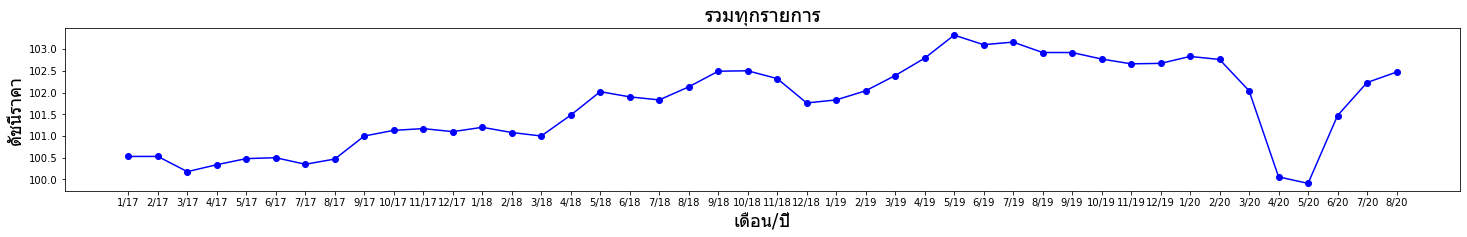

In [23]:
index_ = df[df.index_id == 0] #เลือก index_id ที่เท่ากับ 0 เพราะเป็นหมวดรวมทุกรายการ แล้วเก็บไว้ในตัวแปร index_
month = index_['month'].tolist() #เลือกคอลัมน์ month จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร month
year = index_['year'].tolist() #เลือกคอลัมน์ year จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร year
price_index = index_['price_index'].tolist() #เลือกคอลัมน์ price_index จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร price_index
month_year = [] #สร้างตัวแปร month_year เพื่อรอเก็บค่าหลังจากเอา month กับ year มาต่อกันเพื่อนำไปใช้ในการพล็อตกราฟ
for i in range(len(month)): #วนลูปตามความยาวของตัวแปร month
    #นำตัวแปร month index ที่ i มาต่อกับตัวแปร year 2 ตัวท้าย index ที่ i โดยขั้นตรงกลางด้วย /
    #หลังจากนั้นนำค่าที่ได้เพิ่มเข้าไปใน month_year
    month_year.append(str(month[i]) + '/' + str(year[i])[2:] )
    #example i = 0
    # 1/17

plt.figure(figsize=(25, 3))
#ทำการเปลี่ยนฟอนต์ที่รองรับภาษาไทย
plt.title(u'รวมทุกรายการ' ,fontname='Tahoma',fontsize='20')
plt.xlabel(u'เดือน/ปี',fontname='Tahoma',fontsize='18')
plt.ylabel(u'ดัชนีราคา',fontname='Tahoma',fontsize='18')
#พล็อตกราฟโดยแกน x คือเดือน/ปี (จากตัวแปร month_year) แกน y คือดัชนีราคา (จากตัวแปร price_index) และตั้งค่าให้เส้นเป็นสีน้ำเงินและมีจุดวงกลม
plt.plot(month_year, price_index, '-bo');

จากกราฟเส้น **รวมทุกรายการ** จะเห็นได้ว่าเพราะข่าวไวรัสโควิด-19 ในช่วงต้นปี2020 ส่งผลให้คนเริ่มไม่กล้าใช้เงิน ทำให้ต้องปรับราคาสินค้าลง (ลดราคาลงเพื่อให้ของขายออก) และเมื่อมีประกาศพรก.ฉุกเฉินจากรัฐบาลเมื่อวันที่ 25/03/2020 (https://www.bangkokbiznews.com/news/detail/872653) จะเห็นได้ว่าราคาสินค้าต่างๆลดลงอย่างชัดเจน ซึ่งเมื่อข่าวไวรัสโควิด-19 เริ่มดีขึ้นราคาสินค้าต่างๆก็เริ่มกลับขึ้นมา ซึ่งในช่วงโควิดก็มีทั้งสินค้าที่ราคาเพิ่มขึ้นและลดลง

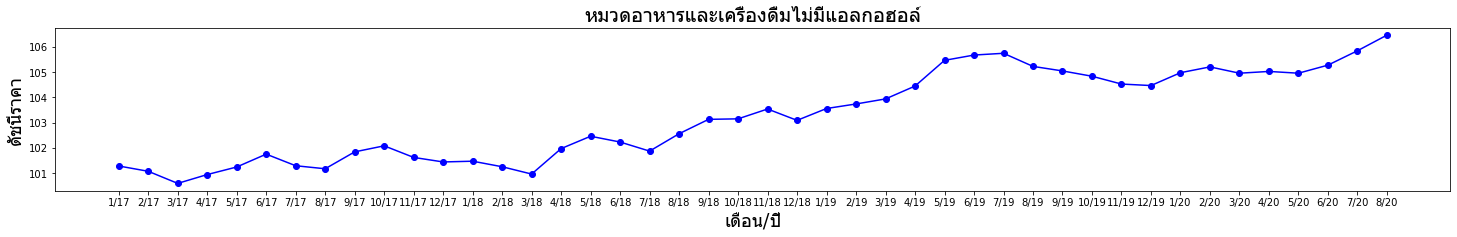

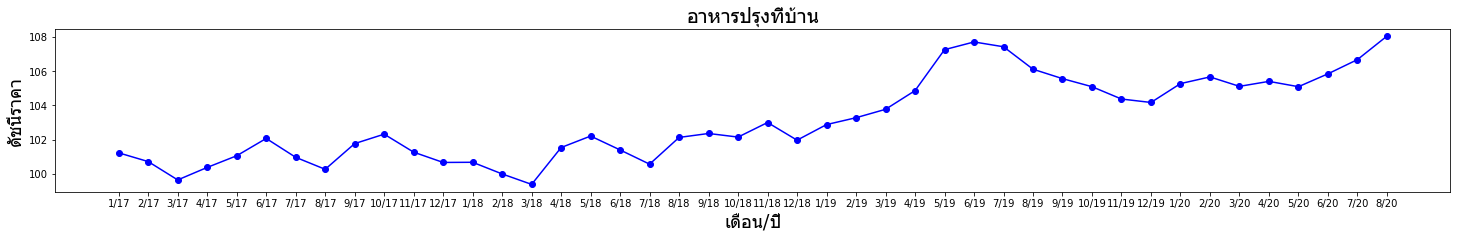

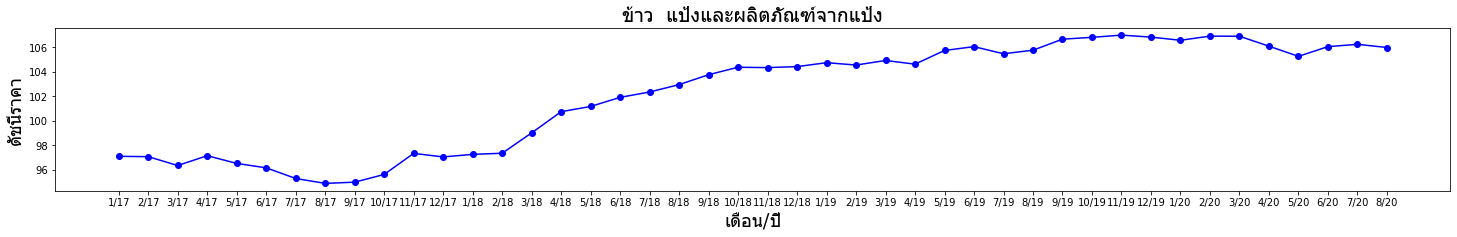

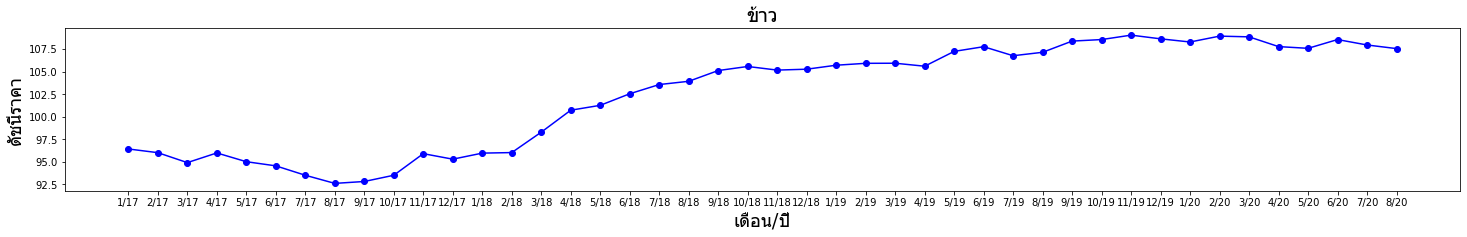

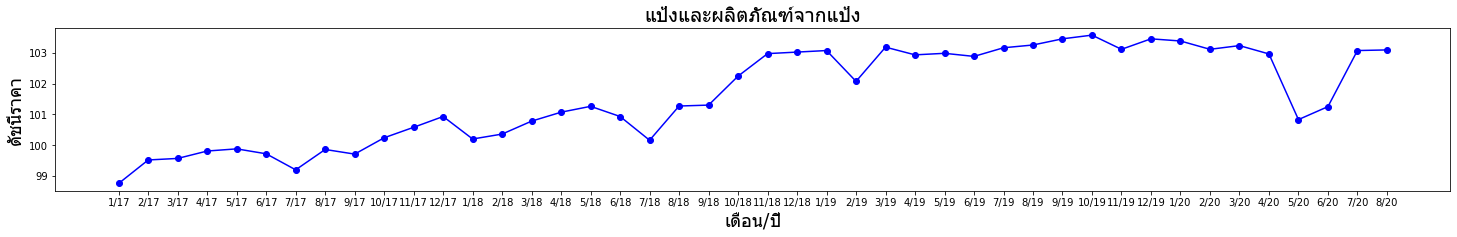

In [24]:
#มีทั้งหมด 189 หมวด (1-189) ไม่นับหมวดรวมทุกรายการ ถ้าใส่เลขเยอะจะใช้เวลารันนาน
show = 5 #ตัวแปร show จะแสดงจำนวนกราฟตามที่กำหนด

for i in CPI_index_id_list[1:show+1]:
    #วนลูปในตัวแปร CPI_index_id_list ซึ่งเก็บ index_id ทั้งหมด แต่จะเริ่มพล็อตกราฟตั้งแต่ index ที่ 1 เพราะได้ทำการพล็ตกราฟของหมวดรวมทุกรายการไปแล้ว
    #i แต่ละรอบคือ index_id
    index_ = df[df.index_id == i] #เลือก index_id ที่เท่ากับ i แล้วเก็บไว้ในตัวแปร index_
    month = index_['month'].tolist() #เลือกคอลัมน์ month จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร month
    year = index_['year'].tolist() #เลือกคอลัมน์ year จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร year
    price_index = index_['price_index'].tolist() #เลือกคอลัมน์ price_index จากตัวแปร index_ แล้วแปลงให้เป็น list จากนั้นเก็บไว้ในตัวแปร price_index
    month_year = [] #สร้างตัวแปร month_year เพื่อรอเก็บค่าหลังจากเอา month กับ year มาต่อกันเพื่อนำไปใช้ในการพล็อตกราฟ
    for i in range(len(month)): #วนลูปตามความยาวของตัวแปร month
    #นำตัวแปร month index ที่ i มาต่อกับตัวแปร year 2 ตัวท้าย index ที่ i โดยขั้นตรงกลางด้วย /
    #หลังจากนั้นนำค่าที่ได้เพิ่มเข้าไปใน month_year
        month_year.append(str(month[i]) + '/' + str(year[i])[2:] )

    #เช็คว่าความยาวของ index_ ต้องมากกว่า 0 ถึงจะทำการพล็อตกราฟเพราะว่า index_id บางตัวนั้นไม่มีข้อมูล
    if len(index_['index_description'].tolist()) > 0:
        plt.figure(figsize=(25, 3))
        #กำหนดให้ title แสดงเป็น index_description ของแต่ละรอบและเปลี่ยนฟอนต์ที่รองรับภาษาไทย
        plt.title(u''+index_['index_description'].tolist()[0] ,fontname='Tahoma',fontsize='20')
        plt.xlabel(u'เดือน/ปี',fontname='Tahoma',fontsize='18')
        plt.ylabel(u'ดัชนีราคา',fontname='Tahoma',fontsize='18')
        #พล็อตกราฟโดยแกน x คือเดือน/ปี (จากตัวแปร month_year) แกน y คือดัชนีราคา (จากตัวแปร price_index) และตั้งค่าให้เส้นเป็นสีน้ำเงินและมีจุดวงกลม
        plt.plot(month_year, price_index, '-bo');
    else:
        continue

จากที่กล่าวข้างต้นว่าในช่วงโควิดก็มีทั้งสินค้าที่ราคาเพิ่มขึ้นและลดลง เมื่อดูจากกราฟเส้นที่แสดงจะเห็นได้ว่า**หมวดอาหารและเครื่องดื่มไม่มีแอลกอฮอล์ อาหารปรุงที่บ้าน** เป็นต้น มีแนวโน้มดัชนีราคาที่เพิ่มสูงขึ้นในช่วงโควิด-19 ส่วนหมวดที่แนวโน้มดัชนีราคาลดลงในช่วงโควิด-19 เช่น **หมวดแป้งและผลิตภัณฑ์จากแป้ง**

## หมวดที่ราคาลดลง/เพิ่มขึ้น จากปีก่อนมากที่สุด 10 อันดับแรก
#### <font color='red'>Bar plot</font>

พล็อตเพื่อดูว่าหมวดไหนมีราคาลดลง/เพิ่มขึ้นจากปีก่อน 10 อันดับแรก

In [25]:
#เดือนที่จะเทียบคือเดือน 8 และปี 2020 กับ 2019

#หมวดที่ราคาลดลงจากปีก่อนมากที่สุด 10 อันดับแรก เก็บไว้ในตัวแปร decreaseFiveYOY
decreaseTenYOY = df[(df.year == 2020) & (df.month == 8)].sort_values(by=['yoy']).head(10)[::-1]

#หมวดที่ราคาเพิ่มขึ้นจากปีก่อนมากที่สุด 10 อันดับแรก เก็บไว้ในตัวแปร increaseFiveYOY
increaseTenYOY = df[(df.year == 2020) & (df.month == 8)].sort_values(by=['yoy']).tail(10)

print(decreaseTenYOY[['index_description', 'yoy']], '\n\n', increaseTenYOY[['index_description', 'yoy']])

                                index_description    yoy
6555  การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ  -1.83
7435                       กลุ่มอาหารสดและพลังงาน  -2.86
5103             หมวดพาหนะ การขนส่ง และการสื่อสาร  -3.89
5279                  ยานพาหนะและน้ำมันเชื้อเพลิง  -6.58
1231                        ผลไม้สดแปรรูปและอื่นๆ  -6.79
1275                                      ผลไม้สด  -6.86
7523                                      พลังงาน  -8.77
3695                             เชื้อเพลิงในบ้าน -10.59
7655                       น้ำมัน 91 , 95 , ดีเซล -12.49
5455                             น้ำมันเชื้อเพลิง -14.46 

                    index_description    yoy
1187               ผักแปรรูปและอื่นๆ   3.43
351   เนื้อสัตว์ เป็ดไก่ และสัตว์น้ำ   3.75
1583                   เครื่องปรุงรส   3.94
1495                เครื่องปรุงอาหาร   4.78
1539                  น้ำมันและไขมัน   6.28
4311                        เวชภัณฑ์   6.43
395                       เนื้อสัตว์   9.13
439               

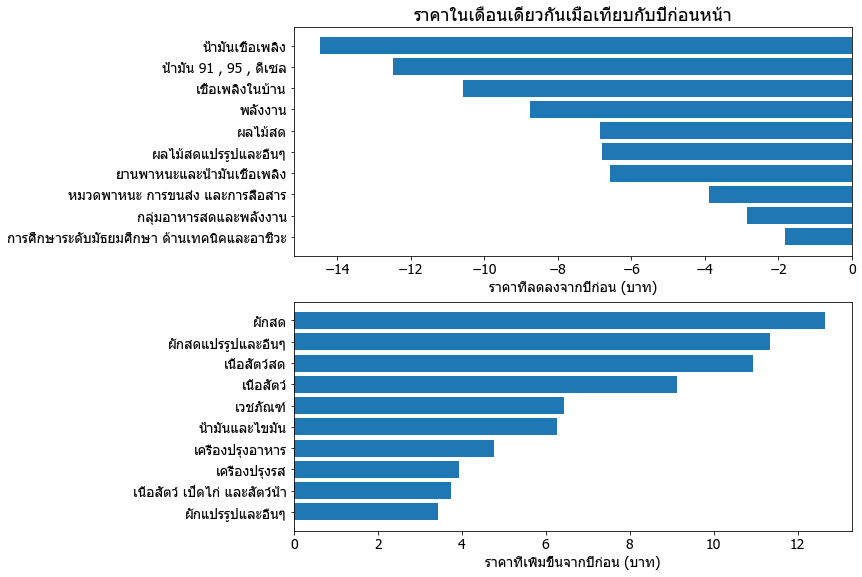

In [26]:
#เปลี่ยนเป็นฟอนต์ที่รองรับภาษาไทย ที่ต้องกำหนดตรงนี้เพราะจะได้เปลี่ยนในส่วนของ index_description ที่แสดงในแกน y
plt.rc('font', **{'family' : 'Tahoma',
                 'size' : '14'})

plt.figure(figsize=(10, 7))
plt.subplots_adjust(top = 10, bottom=9)

plt.subplot(2,1,1)
plt.title(u'ราคาในเดือนเดียวกันเมื่อเทียบกับปีก่อนหน้า' ,fontname='Tahoma',fontsize='18')

#แกน y คือคอลัมน์ index_description และแกน x คือคอลัมน์ yoy ของ decreaseFiveYOY
plt.barh(decreaseTenYOY['index_description'], decreaseTenYOY['yoy'])
plt.xlabel(u'ราคาที่ลดลงจากปีก่อน (บาท)')

plt.subplot(2,1,2)
#แกน y คือคอลัมน์ index_description และแกน x คือคอลัมน์ yoy ของ increaseFiveYOY
plt.barh(increaseTenYOY['index_description'], increaseTenYOY['yoy'])
plt.xlabel(u'ราคาที่เพิ่มขึ้นจากปีก่อน (บาท)');

จาก Bar plot ข้างบนจะเห็นได้ว่าหมวดที่ราคาลดลงจากปีก่อนหน้ามากที่สุดคือ **น้ำมันเชื้อเพลิง** โดยราคาลดลงไป 14.46 บาทและหมวดที่ราคาเพิ่มขึ้นจากปีก่อนหน้ามากที่สุดคือ **ผักสด** โดยราคาเพิ่มขึ้น 12.66 บาท

## กราฟเส้นหมวดที่ราคาลดลงจากปีก่อนมากที่สุด 10 อันดับแรก
#### <font color='red'>Line plot</font>

แสดงแนวโน้มของหมวดที่ราคาลดลงจากปีก่อนมากที่สุด 10 อันดับแรก เพื่อดูว่ามีหมวดไหนบ้างที่กราฟไปในทางเดียวกัน

In [27]:
#ตัวแปร relatedCategoriesDecrease เก็บค่า index_description ของหมวดที่ราคาลดลงจากปีก่อนมากที่สุด 10 อันดับแรก
#คาดว่าในตัวแปร relatedCategoriesDecrease จะมีตัวที่เกี่ยวข้องกัน
relatedCategoriesDecrease = decreaseTenYOY['index_description'].tolist()
for i in relatedCategoriesDecrease:
    print(i)

การศึกษาระดับมัธยมศึกษา ด้านเทคนิคและอาชีวะ
กลุ่มอาหารสดและพลังงาน
หมวดพาหนะ การขนส่ง และการสื่อสาร
ยานพาหนะและน้ำมันเชื้อเพลิง
ผลไม้สดแปรรูปและอื่นๆ
ผลไม้สด
พลังงาน
เชื้อเพลิงในบ้าน
น้ำมัน 91 , 95 , ดีเซล
น้ำมันเชื้อเพลิง


In [28]:
#fuction relatedCategoriesPriceIndexDecrease จะรับค่าตัวเลขเข้ามา
#ตัวเลขดังกล่าวคือ index ที่เอาไปใช้ดึงข้อมูลจากตัวแปร relatedCategoriesDecrease
#ค่าที่ function นี้จะส่งกลับไปก็คือ price_index
def relatedCategoriesPriceIndexDecrease(index):
    return df[df.index_description == relatedCategoriesDecrease[index]]['price_index'].tolist()

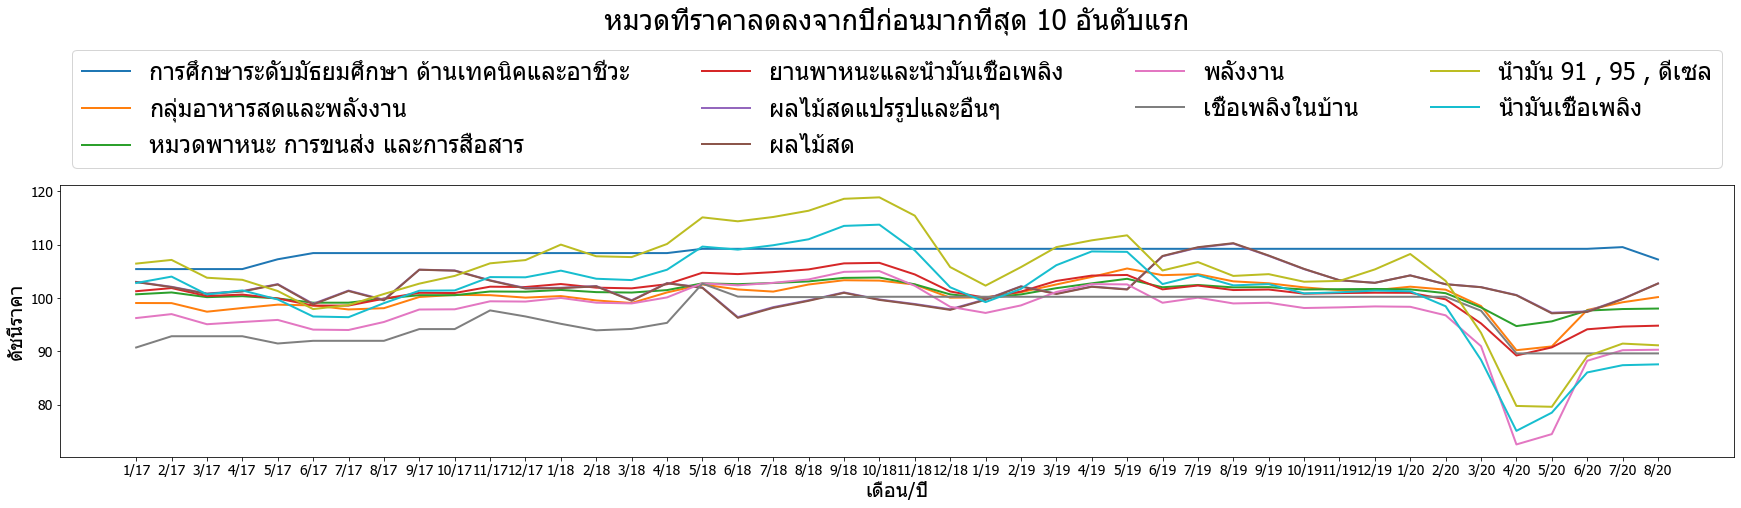

In [29]:
#เปลี่ยนเป็นฟอนต์ที่รองรับภาษาไทย ที่ต้องกำหนดตรงนี้เพราะจะได้เปลี่ยนในส่วนของ index_description ที่แสดงใน legend
plt.rc('font', **{'family' : 'Tahoma',
                 'size' : '14'})

#สร้างตัวแปร month_year เพื่อใช้เก็บค่าเดือน/ปี เพื่อนำไปกำหนดค่าในแกน x
index_ = df[df.index_id == 0]
month = index_['month'].tolist()
year = index_['year'].tolist()
month_year = []
for i in range(len(month)):
    month_year.append(str(month[i]) + '/' + str(year[i])[2:])

plt.figure(figsize=(30, 5))

#วนลูปตามความยาวของ relatedCategoriesDecrease
for i in range(len(relatedCategoriesDecrease)):    
    #สร้างตัวแปร relatedCategories_i เพื่อเก็บ price_index ที่ function relatedCategoriesPriceIndexDecrease ส่งกลับมา
    relatedCategories_i = relatedCategoriesPriceIndexDecrease(i)
    #พล็อตกราฟเส้นซ้อนกันไปเรื่อย ๆ จนกว่าจะจบลูป 
    #แกน x คือเดือน/ปีที่เก็บไว้ในตัวแปร month_year
    #แกน y คือดัชนีราคาที่เก็บไว้ในตัวแปร relatedCategoriesDecrease
    #label คือ index_description และกำหนดให้ความหนาของเส้นเท่ากับ 2
    plt.plot(month_year, relatedCategories_i, label=relatedCategoriesDecrease[i], linewidth=2)
    
plt.title(u'หมวดที่ราคาลดลงจากปีก่อนมากที่สุด 10 อันดับแรก', y=1.55, fontsize='28')
plt.xlabel(u'เดือน/ปี', fontsize='20')
plt.ylabel(u'ดัชนีราคา', fontsize='20')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", fontsize='24')

plt.show();

จากกราฟเส้นข้างบนจะเห็นว่า **ยานพหนะและน้ำมันเชื่อเพลิง, พลังงาน, น้ำมัน 91 95 ดีเซล, กลุ่มอาหารสดและพลังงาน, เชื้อเพลิงในบ้าน, น้ำมันเชื้อเพลิง และหมวดพาหนะ การขนส่ง และการสื่อสาร** แนวโน้มของกราฟจะไปในทิศทางเดียวกัน โดยสินค้าดังกล่าวจะจัดอยู่ในหมวดของ**เชื้อเพลิง พลังงานและยานพาหนะ** เมื่อดูกราฟในช่วงโควิดจะเห็นว่าดัชนีราคาในช่วงเวลาดังกล่าวมีค่าลดลงเพราะประชาชนส่วนใหญ่ต้องกักตัวอยู่บ้าน เดินทางน้อยลง ทำงานอยู่บ้าน เหตุผลเหล่านี้ส่งผลให้สินค้าในหมวดข้างต้นเป็นที่ต้องการน้อยลงจึงทำให้ราคาสินค้าลดลงตามไปด้วย (https://www.posttoday.com/economy/news/621491)

## กราฟเส้นหมวดที่ราคาเพิ่มขึ้นจากปีก่อนมากที่สุด 10 อันดับแรก
#### <font color='red'>Line plot</font>

แสดงแนวโน้มของหมวดที่ราคาเพิ่มจากปีก่อนมากที่สุด 10 อันดับแรก เพื่อดูว่ามีหมวดไหนบ้างที่กราฟไปในทางเดียวกัน

In [30]:
#ตัวแปร relatedCategoriesIncrease เก็บค่า index_description ของหมวดที่ราคาเพิ่มขึ้นจากปีก่อนมากที่สุด 10 อันดับแรก
#คาดว่าในตัวแปร relatedCategoriesIncrease จะมีตัวที่เกี่ยวข้องกัน
relatedCategoriesIncrease = increaseTenYOY['index_description'].tolist()
for i in relatedCategoriesIncrease:
    print(i)

ผักแปรรูปและอื่นๆ
เนื้อสัตว์ เป็ดไก่ และสัตว์น้ำ
เครื่องปรุงรส
เครื่องปรุงอาหาร
น้ำมันและไขมัน
เวชภัณฑ์
เนื้อสัตว์
เนื้อสัตว์สด
ผักสดแปรรูปและอื่นๆ
ผักสด


In [31]:
#fuction relatedCategoriesPriceIndexIncrease จะรับค่าตัวเลขเข้ามา
#ตัวเลขดังกล่าวคือ index ที่เอาไปใช้ดึงข้อมูลจากตัวแปร relatedCategorieIncrease
#ค่าที่ function นี้จะส่งกลับไปก็คือ price_index
def relatedCategoriesPriceIndexIncrease(index):
    return df[df.index_description == relatedCategoriesIncrease[index]]['price_index'].tolist()

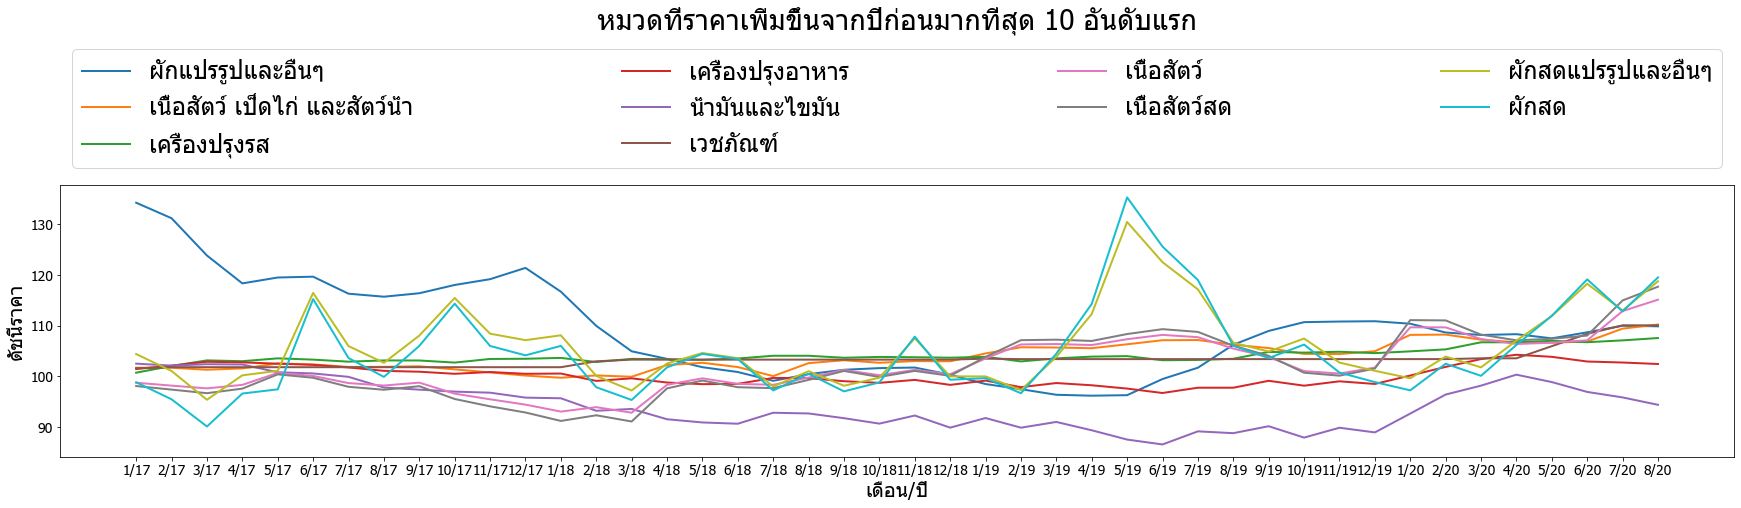

In [32]:
#เปลี่ยนเป็นฟอนต์ที่รองรับภาษาไทย ที่ต้องกำหนดตรงนี้เพราะจะได้เปลี่ยนในส่วนของ index_description ที่แสดงใน legend
plt.rc('font', **{'family' : 'Tahoma',
                 'size' : '14'})

#สร้างตัวแปร month_year เพื่อใช้เก็บค่าเดือน/ปี เพื่อนำไปกำหนดค่าในแกน x
index_ = df[df.index_id == 0]
month = index_['month'].tolist()
year = index_['year'].tolist()
month_year = []
for i in range(len(month)):
    month_year.append(str(month[i]) + '/' + str(year[i])[2:])

plt.figure(figsize=(30, 5))

#วนลูปตามความยาวของ relatedCategoriesIncrease
for i in range(len(relatedCategoriesIncrease)):    
    #สร้างตัวแปร relatedCategories_i เพื่อเก็บ price_index ที่ function relatedCategoriesPriceIndexIncrease ส่งกลับมา
    relatedCategories_j = relatedCategoriesPriceIndexIncrease(i)
    #พล็อตกราฟเส้นซ้อนกันไปเรื่อย ๆ จนกว่าจะจบลูป 
    #แกน x คือเดือน/ปีที่เก็บไว้ในตัวแปร month_year
    #แกน y คือดัชนีราคาที่เก็บไว้ในตัวแปร relatedCategoriesDecrease
    #label คือ index_description และกำหนดให้ความหนาของเส้นเท่ากับ 2
    plt.plot(month_year, relatedCategories_j, label=relatedCategoriesIncrease[i], linewidth=2)
    
plt.title(u'หมวดที่ราคาเพิ่มขึ้นจากปีก่อนมากที่สุด 10 อันดับแรก', y=1.55, fontsize='28')
plt.xlabel(u'เดือน/ปี', fontsize='20')
plt.ylabel(u'ดัชนีราคา', fontsize='20')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", fontsize='24')

plt.show();

จากกราฟเส้นข้างบนจะเห็นว่า **ผักแปรรูปและอื่นๆ, เครื่องปรุงอาหาร, เนื้อสัตว์, ผักสดแปรรูปและอื่นๆ, เนื้อสัตว์ เป็ดไก่ และสัตว์น้ำ, น้ำมันและไขมัน, เนื้อสัตว์สด, ผักสด, เครื่องปรุงรส** แนวโน้มของกราฟจะไปในทิศทางเดียวกัน โดยสินค้าดังกล่าวจะจัดอยู่ในหมวดของ**อาหาร** เมื่อดูกราฟในช่วงโควิดจะเห็นว่าดัชนีราคาในช่วงเวลาดังกล่าวมีค่าที่เพิ่มสูงขึ้นเพราะประชาชนส่วนใหญ่ต้องกักตัวอยู่บ้าน เดินทางน้อยลง ทำงานอยู่บ้าน เหตุผลเหล่านี้ส่งผลให้สินค้าในหมวดข้างต้นเป็นที่ต้องการมากขึ้นเพราะการที่ต้องออกไปข้างนอกเป็นเรื่องที่อันตราย การจับจ่ายซื้อของนอกบ้านแต่ละทีจึงต้องมีการซื้อตุนไว้จึงทำให้ราคาสินค้าเพิ่มขึ้นตามไปด้วย 

แต่จะมีหมวดหนึ่งที่แตกต่างจากพวกคือ **เวชภัณฑ์** (อุปกรณ์ทางการแพทย์) เหตุที่ทำให้หมวดเวชภัณฑ์มีราคาสูงขึ้นเพราะในช่วงโควิดมีคนต้องการอุปกรณ์ทางการแพทย์เป็นจำนวนมาก ราคาของสินค้าในหมวดนี้จึงสูงขึ้นเช่นกัน

## หาสัดส่วนราคาสินค้าลดลง/เพิ่มขึ้น/เท่าเดิม
#### <font color='red'>Pie chart</font>

พล็อต pie chart เพื่อหาสัดส่วนว่าในเดือนเดียวกันของปีที่ผ่านมา(yoy) เพื่อดูว่าดัชนีราคาส่วนใหญ่ลดลง เพิ่มขึ้นหรือเท่าเดิม

In [33]:
#ตัวแปร lenDfNow เก็บค่าขนาดของ Dataframe ในปัจจุบัน (เดือน 8 ปี 2020) เพื่อใช้ในการหาสัดส่วน
lenDfNow = len(df[(df.year == 2020) & (df.month == 8)])

#ตัวแปร percentDecrease เก็บเปอร์เซ็นต์หมวดสินค้าที่มีดัชนีราคาลดลง
percentDecrease = round(len(df[(df.yoy < 0) & (df.year == 2020) & (df.month == 8)]) / lenDfNow *100, 3)

#ตัวแปร percentSame เก็บเปอร์เซ็นต์หมวดสินค้าที่มีดัชนีราคาเท่าเดิม
percentSame = round(len(df[(df.yoy == 0) & (df.year == 2020) & (df.month == 8)]) / lenDfNow*100, 3)

#ตัวแปร percentIncrease เก็บเปอร์เซ็นต์หมวดสินค้าที่มีดัชนีราคาเพิ่มขึ้น
percentIncrease = round(len(df[(df.yoy > 0) & (df.year == 2020) & (df.month == 8)]) / lenDfNow*100, 3)

#คูณ 100 เพื่อแปลงเป็นเปอร์เซ็นต์ แล้วใช้คำสั่ง round เพื่อปัดจุดทศนิยมให้เหลือ 3 หลัก

print('ราคาลดลง:\t',percentDecrease, '%\nราคาเท่าเดิม:\t',percentSame, '%\nราคาเพิ่มขึ้น:\t', percentIncrease, '%')
print('รวมทั้งหมด:\t', percentDecrease + percentSame + percentIncrease, '%')

ราคาลดลง:	 29.714 %
ราคาเท่าเดิม:	 29.143 %
ราคาเพิ่มขึ้น:	 41.143 %
รวมทั้งหมด:	 100.0 %


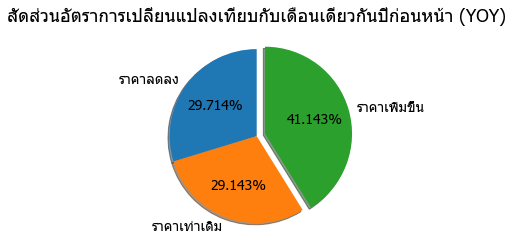

In [34]:
values = [percentDecrease, percentSame, percentIncrease] #เก็บสัดส่วนของราคาลดลง ราคาเท่าเดิมและราคาเพิ่มขึ้น ตามลำดับ
lables = ['ราคาลดลง', 'ราคาเท่าเดิม', 'ราคาเพิ่มขึ้น'] #เก็บ lable ของราคาลดลง ราคาเท่าเดิมและราคาเพิ่มขึ้น ตามลำดับ
explode = (0, 0, 0.1) #ทำให้ pie ก้อนที่ 3 เด้งออกมา
plt.title(u'สัดส่วนอัตราการเปลี่ยนแปลงเทียบกับเดือนเดียวกันปีก่อนหน้า (YOY)' ,fontname='Tahoma',fontsize='18')
plt.pie(values, explode=explode, labels=lables, shadow=True, autopct='%1.3f%%', startangle=90);

จาก Pie chart ข้างบนจะเห็นว่า**ดัชนีราคาสินค้าส่วนใหญ่เพิ่มขึ้น** ถือเป็น 41.143% จากทั้งหมด

อีกสองส่วนที่เหลือคือ **ราคาลดลง**และ**ราคาเท่าเดิม** มีสัดส่วนเป็น 29.714% และ 29.143% ตามลำดับ ถือว่ามีสัดส่วนพอ ๆ กัน

สรุปได้ว่าในช่วง 1 ปีที่ผ่านมาดัชนีราคาผู้บริโภคทั่วไปมีแนวโน้มที่เพิ่มสูงขึ้น

## วิเคราะห์ดัชนีราคาที่เพิ่ม/ลดส่วนใหญ่เป็นจำนวนกี่บาท
#### <font color='red'>Histogram</font>

วิเคราะห์ว่าดัชนีราคาส่วนใหญ่ที่เพิ่มขึ้นหรือลดลงเป็นจำนวนกี่บาท โดยวิธีกำหนดจำนวน bin จะใช้ Rice rule

In [35]:
#ตัวแปร priceIndexYOY เก็บค่าอัตราการเปลี่ยนแปลงเทียบกับเดือนเดียวกันปีก่อนหน้า (เดือน 8 ปี 2020 ที่เทียบเดือนเดียวกันในปี 2019)
priceIndexYOY = df[(df.year == 2020) & (df.month == 8)]['yoy']

#ตัวแปร priceIndexMON เก็บค่าอัตราการเปลี่ยนแปลงเทียบกับเดือนก่อนหน้า (เดือน 8 ปี 2020 ที่เทียบกับปีเดียวกันในเดือน 7)
priceIndexMON = df[(df.year == 2020) & (df.month == 8)]['mon']

#ตัวแปร priceIndexAOA เก็บค่าอัตราการเปลี่ยนแปลงเทียบกับช่วงเดียวกันปีก่อนหน้า
priceIndexAOA = df[(df.year == 2020) & (df.month == 8)]['aoa']

priceIndexList = [priceIndexYOY,priceIndexMON,priceIndexAOA]
priceIndexNameList = ['อัตราการเปลี่ยนแปลงราคาเทียบกับเดือนเดียวกันปีก่อนหน้า (YOY)', 'อัตราการเปลี่ยนแปลงราคาเทียบกับเดือนก่อนหน้า (MON)', 'อัตราการเปลี่ยนแปลงราคาเทียบกับช่วงเดียวกันปีก่อนหน้า (AOA)']

ใช้ **Rice Rule** ในการหาว่าควรจะกำหนดจำนวน bin เท่าไร

n คือจำนวนข้อมูล

$binSize = 2{ \sqrt{n} ^ {(1/3)} }$ 

$binSize = 2{ \sqrt{175} ^ {(1/3)} }$

$binSize ≈ 11$

In [36]:
binSize = int(2 * (len(priceIndexYOY)**(1/3)))
binSize

11

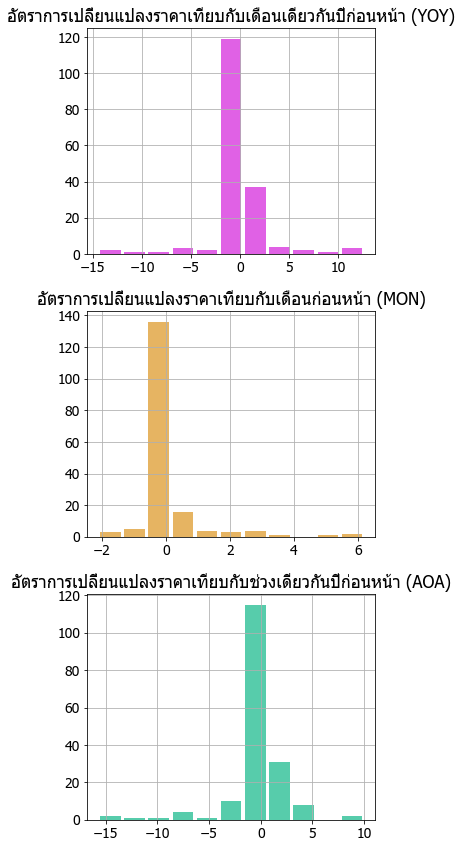

In [37]:
#แสดงความถี่ว่าราคาที่เพิ่ม/ลดส่วนใหญ่เป็นจำนวนกี่บาท
fig, axes = plt.subplots(3,1, figsize = (6,12))
colorList = ['#D31EDB', '#DC941F', '#10B788']

for i in range(len(priceIndexList)):
    axes[i].hist(priceIndexList[i], binSize, color=colorList[i],alpha=0.7, rwidth=0.85)
    axes[i].grid(True)
    axes[i].set_title(priceIndexNameList[i])

fig.tight_layout()
plt.show();

จาก Histogram ของ**อัตราการเปลี่ยนแปลงราคาเทียบกับเดือนเดียวกันปีก่อนหน้า (YOY)** จะเห็นว่าถึงแม้ราคาจะมีการเปลี่ยนแปลงไม่ว่าจะเพิ่มหรือลด ราคาจะ $\pm$ ไม่เกิน 5 บาท

จาก Histogram ของ**อัตราการเปลี่ยนแปลงราคาเทียบกับเดือนก่อนหน้า (MON)** จะเห็นว่าถึงแม้ราคาจะมีการเปลี่ยนแปลงไม่ว่าจะเพิ่มหรือลด ราคาจะ $\pm$ ไม่เกิน 2 บาท

จาก Histogram ของ**อัตราการเปลี่ยนแปลงราคาเทียบกับช่วงเดียวกันปีก่อนหน้า (AOA)** จะเห็นว่าถึงแม้ราคาจะมีการเปลี่ยนแปลงไม่ว่าจะเพิ่มหรือลด ราคาจะ $\pm$ ไม่เกิน 5 บาท

เมื่อนำผลวิเคาะห์ที่ได้จาก Pie chart ข้างบนมาดูด้วยกัน จะเห็นว่าในช่วง 1 ปีที่ผ่านมาดัชนีราคาผู้บริโภคทั่วไปส่วนใหญ่มีราคาที่เพิ่มสูงขึ้นในช่วง 0.1 - 5 บาท

# สรุปผล

จากกราฟ**รวมทุกรายการ** จะเห็นได้ว่าเพราะข่าวไวรัสโควิด-19 ในช่วงต้นปี2020 ส่งผลให้ดัชนีราคาผู้บริโภคทั่วไปมีแนวโน้มลดลงในช่วงครึ่งปีแรกแล้วค่อยฟื้นฟูขึ้นมาเรื่อยๆในช่วงเริ่มต้นของครึ่งปีหลัง จากที่กราฟแสดงจะเห็นว่าเศรษฐกิจในครึ่งปีหลังเริ่มดีขึ้นเรื่อย ๆ ถึงขั้นที่ว่าเมื่อทำการหาสัดส่วนของราคาสินค้าเพิ่ม/ลด/เท่าเดิม จะพบว่าเมื่อเทียบในเดือนเดียวกันกับปีก่อนหน้า สัดส่วนของราคาสินค้าเพิ่มขึ้นมีสัดส่วนที่มากที่สุด ซึ่งสัดส่วนดังกล่าวแสดงให้เห็นว่าเศรษฐกิจกำลังดีขึ้นเรื่อย ๆ

ในช่วงโควิดก็มีทั้งหมวดที่ราคาเพิ่มขึ้นและลดลง หมวดที่ราคาสินค้าเพิ่มขึ้นคือ**หมวดอาหาร** ได้แก่ ผักแปรรูปและอื่นๆ, เครื่องปรุงอาหาร, เนื้อสัตว์, ผักสดแปรรูปและอื่นๆ, เนื้อสัตว์ เป็ดไก่ และสัตว์น้ำ, น้ำมันและไขมัน, เนื้อสัตว์สด, ผักสด, เครื่องปรุงรส อีกหมวดที่ราคาเพิ่มขึ้นเช่นกันก็คือ**หมวดเวชภัณฑ์ (อุปกรณ์ทางการแพทย์)** แต่ก็มีหมวดที่ราคาสินค้าลดลงเหมือนกันคือ**หมวดของเชื้อเพลิง พลังงานและยานพาหนะ** ได้แก่ ยานพหนะและน้ำมันเชื่อเพลิง, พลังงาน, น้ำมัน 91 95 ดีเซล, กลุ่มอาหารสดและพลังงาน, เชื้อเพลิงในบ้าน, น้ำมันเชื้อเพลิง และหมวดพาหนะ การขนส่ง และการสื่อสาร

ถึงจะมีหลายหมวดที่ราคาเพิ่มขึ้นและลดลงแต่เมื่อเทียบดัชนีราคาเดือนเดียวกันในปีก่อนหน้า สินค้าส่วนใหญ่ราคาจะ $\pm$ ไม่เกิน 5 บาท

แม้ว่าสินค้าส่วนใหญ่ราคา $\pm$ ไม่เกิน 5 บาทแต่ก็มีสินค้าที่ราคาเพิ่มขึ้นและลดลงมากกว่านั้นเช่นกัน เช่น
- หมวดผักสด ราคาเพิ่มขึ้น 12.66 บาท
- หมวดน้ำมันเชื้อเพลิง ราคาลดลงไป 14.46 บาท

**เศรษฐกิจเริ่มฟื้นฟูกลับมาหลังจากสถานการณ์โควิด-19 เริ่มดีขึ้นในช่วงครึ่งปีหลังของปี 2020**

## ปัญหาที่พบ

1. ตัวอักษรภาษาไทยยังมีปัญหาเรื่องสระหาย
2. พบปัญหาในเรื่องของการพล็อตกราฟเช่น ตัวอักษรเบียดกันเกินไป
3. โค้ดในบางส่วนยังมีการซ้ำกัน อาจจะส่งผลให้รันนานขึ้น
4. ใช้ข้อมูลจากแหล่งเดียว ทำให้นำเสนอได้ไม่หลากหลาย
5. ไม่เข้าใจคอลัมน์ **aoa** เพราะทางผู้ให้บริการให้คำอธิบายที่ไม่ชัดเจน จึงอาจทำให้นำเสนอข้อมูลในส่วนนี้ได้น้อยลง